# Project Title: Policy recommendation for preventing obesity, a potential strong predictor for coronavirus disease.
Team members: Tetsuo Fujino (tfujino), Jinyoung Hur (jinahur), Takayuki Kitamura (kitamura), Sarah Woo (sarahwoo)

Objective: 
- Provide meaningful policy recommendations to cope with the current pandemic as well as obesity-related health issues in the long-term through machine-learning predictions of obesity and coronavirus deaths

Key Ideas:
- Identify best predictors of obesity rates among demographics, health or lifestyle-related features
- Apply the learnings to predict coronavirus death rates
- Provide meaningful policy interventions/recommendations for fighting coronavirus disease through reducing obesity rates

# 1. Data Cleaning and Analysis

## 1.1 Data Gathering (incl. merging into a single dataframe)

Load education, income, food consumption behavior, and obesity data. Merge all dataframes into a single dataframe for applying Machine Learning models.

In [1]:
import pipeline_ as pl
import pandas as pd
import numpy as np
%reload_ext autoreload
%autoreload 2
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, \
                             GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_precision_recall_curve 
from sklearn.pipeline import Pipeline
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load income data
income_df = pd.read_csv('income.csv')
income_df.head(5)

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018
0,0,US,United States,NaN,NaN,NaN,"161,640,488","155,344,043","6,296,445",3.9,"$61,937",NaN
1,1000,AL,Alabama,NaN,NaN,NaN,"2,198,837","2,112,347","86,490",3.9,"$49,881",100.0
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,"25,957","25,015",942,3.6,"$59,338",119.0
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,"93,849","90,456","3,393",3.6,"$57,588",115.5
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,"8,373","7,940",433,5.2,"$34,382",68.9


In [3]:
# Obtain relevant features from income data
income_df2 = income_df[['FIPS','Metro_2013', 'Unemployment_rate_2018', 'Median_Household_Income_2018']]
income_df2.head()

,FIPS,Metro_2013,Unemployment_rate_2018,Median_Household_Income_2018
0,0,NaN,3.9,"$61,937"
1,1000,NaN,3.9,"$49,881"
2,1001,1.0,3.6,"$59,338"
3,1003,1.0,3.6,"$57,588"
4,1005,0.0,5.2,"$34,382"


In [4]:
# Load obesity data
obesity_df = pd.read_csv('obesity.csv')
obesity_df.head(5)

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit
0,Autauga County,Alabama,1001,33.2,27.2,39.5
1,Baldwin County,Alabama,1003,31.1,28,34.4
2,Barbour County,Alabama,1005,41.7,34.1,49.5
3,Bibb County,Alabama,1007,37.7,30,46.7
4,Blount County,Alabama,1009,33.7,27.7,39.9


In [5]:
# Obtain relevant features from obesity data
obesity_df2 = obesity_df[['County', 'State', 'CountyFIPS', 'Percentage']]

In [6]:
# Merge obesity and income data
merged = obesity_df2.merge(income_df2, left_on='CountyFIPS', right_on='FIPS').drop(columns='FIPS')
merged.head()

,County,State,CountyFIPS,Percentage,Metro_2013,Unemployment_rate_2018,Median_Household_Income_2018
0,Autauga County,Alabama,1001,33.2,1.0,3.6,"$59,338"
1,Baldwin County,Alabama,1003,31.1,1.0,3.6,"$57,588"
2,Barbour County,Alabama,1005,41.7,0.0,5.2,"$34,382"
3,Bibb County,Alabama,1007,37.7,1.0,4.0,"$46,064"
4,Blount County,Alabama,1009,33.7,1.0,3.5,"$50,412"


In [7]:
# Load education data
education_df = pd.read_csv('education.csv', encoding='ISO-8859-1')
education_df.head()

,FIPS Code,State,Area name,"Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18"
0,0,US,United States,"26,948,057","59,265,308","63,365,655","68,867,051",12.3,27.1,29.0,31.5
1,1000,AL,Alabama,"470,043","1,020,172","987,148","822,595",14.2,30.9,29.9,24.9
2,1001,AL,Autauga County,"4,204","12,119","10,552","10,291",11.3,32.6,28.4,27.7
3,1003,AL,Baldwin County,"14,310","40,579","46,025","46,075",9.7,27.6,31.3,31.3
4,1005,AL,Barbour County,"4,901","6,486","4,566","2,220",27.0,35.7,25.1,12.2


In [8]:
# Obtain relevant features from education data
education_df2 = education_df[['FIPS Code', 'Percent of adults with less than a high school diploma, 2014-18', 
                              'Percent of adults with a high school diploma only, 2014-18', 
                              '''Percent of adults completing some college or associate's degree, 2014-18''', 
                              '''Percent of adults with a bachelor's degree or higher, 2014-18''']]

In [9]:
# Merge education data with already merged obesity and income data
merged = merged.merge(education_df2, left_on='CountyFIPS', right_on='FIPS Code').drop(columns='FIPS Code')

In [10]:
# Read consumption behaviours data

#Read excel as pandas dataframe
con_beh_multi = pd.read_excel('consumption_behavior.xls', 
                              sheet_name=['STORES', 'RESTAURANTS', 'ASSISTANCE', 'PRICES_TAXES', 
                                          'LOCAL', 'HEALTH', 'SOCIOECONOMIC'])
# Set sheet_dic
sheet_dic = {'STORES' : ['FIPS', 'GROCPTH14', 'CONVSPTH14', 'SNAPSPTH16'],
               'RESTAURANTS' : ['FIPS', 'FFRPTH14', 'PC_FSRSALES12'],
               'PRICES_TAXES' : ['FIPS', 'SODA_PRICE10', 'CHIPSTAX_STORES14'],
                'LOCAL' : ['FIPS', 'PCT_LOCLFARM12', 'FMRKTPTH16'],
                'HEALTH' : ['FIPS', 'RECFACPTH14'],
                'SOCIOECONOMIC': ['FIPS', 'PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10']}

# A function which extracts necessary columns from each sheet
def extract_variables(df_multi, sheet_dic):
    for key, value in sheet_dic.items():
        df_multi[key] = df_multi[key].loc[:, value]
    return df_multi

# Apply the function
new_con_beh_multi = extract_variables(con_beh_multi, sheet_dic)

# Merge sheets into one sheet.
con_beh = pd.merge(new_con_beh_multi['STORES'], new_con_beh_multi['RESTAURANTS'])
con_beh = pd.merge(con_beh, new_con_beh_multi['PRICES_TAXES'])
con_beh = pd.merge(con_beh, new_con_beh_multi['LOCAL'])
con_beh = pd.merge(con_beh, new_con_beh_multi['HEALTH'])
con_beh = pd.merge(con_beh, new_con_beh_multi['SOCIOECONOMIC'])
con_beh.head()

,FIPS,GROCPTH14,CONVSPTH14,SNAPSPTH16,FFRPTH14,PC_FSRSALES12,SODA_PRICE10,CHIPSTAX_STORES14,PCT_LOCLFARM12,FMRKTPTH16,RECFACPTH14,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10
0,1001,0.072209,0.541565,0.760911,0.649878,512.280987,0.972216,4.0,13.110540,0.018045,0.090261,77.246156,17.582599,2.400542,0.855766
1,1003,0.144920,0.589673,0.949753,0.659634,512.280987,1.001391,4.0,10.414560,0.019179,0.124931,83.504787,9.308425,4.384824,0.735193
2,1005,0.185963,0.706661,1.354387,0.818239,512.280987,0.992584,4.0,2.276708,0.154054,0.000000,46.753105,46.691190,5.051535,0.389700
3,1007,0.222163,0.666489,0.864874,0.222163,512.280987,0.972216,4.0,6.878307,0.044164,0.044433,75.020729,21.924504,1.771765,0.096007
4,1009,0.103952,0.467784,0.815946,0.363832,512.280987,0.972216,4.0,7.091056,0.017330,0.051976,88.887338,1.263040,8.070200,0.200621


In [11]:
# Merge consumption behaviours with already merged obesty/education/income dataframe.
new_merged = pd.merge(merged, con_beh, left_on='CountyFIPS', right_on='FIPS').drop(columns='FIPS')
new_merged.head()

,County,State,CountyFIPS,Percentage,Metro_2013,Unemployment_rate_2018,Median_Household_Income_2018,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18",...,PC_FSRSALES12,SODA_PRICE10,CHIPSTAX_STORES14,PCT_LOCLFARM12,FMRKTPTH16,RECFACPTH14,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10
0,Autauga County,Alabama,1001,33.2,1.0,3.6,"$59,338",11.3,32.6,28.4,...,512.280987,0.972216,4.0,13.110540,0.018045,0.090261,77.246156,17.582599,2.400542,0.855766
1,Baldwin County,Alabama,1003,31.1,1.0,3.6,"$57,588",9.7,27.6,31.3,...,512.280987,1.001391,4.0,10.414560,0.019179,0.124931,83.504787,9.308425,4.384824,0.735193
2,Barbour County,Alabama,1005,41.7,0.0,5.2,"$34,382",27.0,35.7,25.1,...,512.280987,0.992584,4.0,2.276708,0.154054,0.000000,46.753105,46.691190,5.051535,0.389700
3,Bibb County,Alabama,1007,37.7,1.0,4.0,"$46,064",16.8,47.3,24.4,...,512.280987,0.972216,4.0,6.878307,0.044164,0.044433,75.020729,21.924504,1.771765,0.096007
4,Blount County,Alabama,1009,33.7,1.0,3.5,"$50,412",19.8,34.0,33.5,...,512.280987,0.972216,4.0,7.091056,0.017330,0.051976,88.887338,1.263040,8.070200,0.200621


In [12]:
# Simplify column names in the merged dataframe
final_df = new_merged.rename(columns={'Percentage': 'Obesity Percentage',
                                      'Metro_2013': 'metro',
                                      'Unemployment_rate_2018': 'unemp_rate',
                                      'Median_Household_Income_2018': 'median_inc',
                                      'Percent of adults with less than a high school diploma, 2014-18': '%educ_less_hs',
                                      'Percent of adults with a high school diploma only, 2014-18': '%educ_hs',
                                      '''Percent of adults completing some college or associate's degree, 2014-18''': '%educ_as',
                                      '''Percent of adults with a bachelor's degree or higher, 2014-18''': '%educ_bach_higher',
                                      'GROCPTH14': 'groc_stores/1000_pop', 
                                      'CONVSPTH14': 'conv_stores/1000_pop',
                                      'SNAPSPTH16': 'snap_auth_stores/1000_pop', 
                                      'FFRPTH14': 'fast_food_rest/1000_pop',
                                      'PC_FSRSALES12': 'rest_exp_per_capita',
                                      'SODA_PRICE10': 'soda_price/nat_avg',
                                      'CHIPSTAX_STORES14': 'snack_sales_tax',
                                      'PCT_LOCLFARM12': '%farm_dir_sales',
                                      'FMRKTPTH16': 'farm_mkt/1000_pop',
                                      'RECFACPTH14': 'recr_fit_facil/1000_pop',
                                      'PCT_NHWHITE10': '%white',
                                      'PCT_NHBLACK10': '%black',
                                      'PCT_HISP10': '%hispanic',
                                      'PCT_NHASIAN10': '%asian'})

In [13]:
# Final dataframe for predicting obesity using various demographic and food consumption behavior features.
final_df.head()

,County,State,CountyFIPS,Obesity Percentage,metro,unemp_rate,median_inc,%educ_less_hs,%educ_hs,%educ_as,...,rest_exp_per_capita,soda_price/nat_avg,snack_sales_tax,%farm_dir_sales,farm_mkt/1000_pop,recr_fit_facil/1000_pop,%white,%black,%hispanic,%asian
0,Autauga County,Alabama,1001,33.2,1.0,3.6,"$59,338",11.3,32.6,28.4,...,512.280987,0.972216,4.0,13.110540,0.018045,0.090261,77.246156,17.582599,2.400542,0.855766
1,Baldwin County,Alabama,1003,31.1,1.0,3.6,"$57,588",9.7,27.6,31.3,...,512.280987,1.001391,4.0,10.414560,0.019179,0.124931,83.504787,9.308425,4.384824,0.735193
2,Barbour County,Alabama,1005,41.7,0.0,5.2,"$34,382",27.0,35.7,25.1,...,512.280987,0.992584,4.0,2.276708,0.154054,0.000000,46.753105,46.691190,5.051535,0.389700
3,Bibb County,Alabama,1007,37.7,1.0,4.0,"$46,064",16.8,47.3,24.4,...,512.280987,0.972216,4.0,6.878307,0.044164,0.044433,75.020729,21.924504,1.771765,0.096007
4,Blount County,Alabama,1009,33.7,1.0,3.5,"$50,412",19.8,34.0,33.5,...,512.280987,0.972216,4.0,7.091056,0.017330,0.051976,88.887338,1.263040,8.070200,0.200621


## 1.2 Data Cleaning/Analysis & Preparation of Train/Test Data

Convert column types to appropriate data types for analysis, check for minimum/maximum values in each column, impute missing values with median, normalize variables to remove different scaling effects.

In [14]:
# Convert data types for further analysis.

# Convert median income column (median_inc) from dollar amounts to numeric values for analysis
final_df['median_inc'] = \
final_df['median_inc'].map(lambda x: x.replace('$','')).apply(lambda x: x.replace(" ", "")).apply(
    lambda x: x.replace(',','')).astype(int)

# Convert Obesity Percentage datatype from object to float (for plotting purposes)
# divided Obesity Percentage by 100 (to make its range from 0 to 1)
final_df["Obesity Percentage"] = final_df["Obesity Percentage"].astype(float) /100

In [15]:
# Split data into training and testing dataset
import pipeline as pipeline
seed = 10
final_df_train1, final_df_test1 = pipeline.create_train_test(
    dataframe=final_df, test_split_size=0.3, rand_state=seed)

final_df_train1_original = final_df_train1.copy()

In [16]:
print("Number of observations in training set: ", len(final_df_train1))
print("Number of observations in testing set: ", len(final_df_test1))

Number of observations in training set:  2197
Number of observations in testing set:  942


In [17]:
# Mean & standard deviation analysis of training data prior to normalization/imputation
pipeline.find_mean_std(final_df_train1) 

,CountyFIPS,Obesity Percentage,metro,unemp_rate,median_inc,%educ_less_hs,%educ_hs,%educ_as,%educ_bach_higher,groc_stores/1000_pop,...,rest_exp_per_capita,soda_price/nat_avg,snack_sales_tax,%farm_dir_sales,farm_mkt/1000_pop,recr_fit_facil/1000_pop,%white,%black,%hispanic,%asian
mean,30405.522076,0.326929,0.367774,4.104688,52939.588075,13.256850,34.186982,30.803368,21.752754,0.252043,...,651.278989,0.991063,1.080951,7.204017,0.059609,0.068987,78.679299,8.614256,8.156369,1.123197
std,15119.353314,0.057357,0.482309,1.422017,13949.044818,6.329175,7.251250,5.219188,9.559526,0.216808,...,116.288626,0.058953,1.985894,6.714873,0.101975,0.072840,19.589126,14.326007,13.009971,2.421968


In [18]:
# Minimum value analysis for features in training data
col_min, col_max = pipeline.find_min_max(final_df_train1, [
    'metro', 'unemp_rate', 'median_inc',
    'groc_stores/1000_pop', 'conv_stores/1000_pop',
    'snap_auth_stores/1000_pop', 'fast_food_rest/1000_pop',
    'rest_exp_per_capita', 'soda_price/nat_avg', 'snack_sales_tax',
    '%farm_dir_sales', 'farm_mkt/1000_pop', 
    'recr_fit_facil/1000_pop',
    '%educ_less_hs', '%educ_hs', '%educ_as','%educ_bach_higher',
    '%white', '%black', '%hispanic', '%asian'])
col_min

metro                            0.000000
unemp_rate                       1.500000
median_inc                   25385.000000
groc_stores/1000_pop             0.000000
conv_stores/1000_pop             0.000000
snap_auth_stores/1000_pop        0.149187
fast_food_rest/1000_pop          0.000000
rest_exp_per_capita            439.731454
soda_price/nat_avg               0.900997
snack_sales_tax                  0.000000
%farm_dir_sales                  0.000000
farm_mkt/1000_pop                0.000000
recr_fit_facil/1000_pop          0.000000
%educ_less_hs                    1.200000
%educ_hs                         5.500000
%educ_as                         5.800000
%educ_bach_higher                0.000000
%white                           2.860408
%black                           0.000000
%hispanic                        0.000000
%asian                           0.000000
dtype: float64

In [19]:
# Maximum value analysis for features in training data
col_max

metro                             1.000000
unemp_rate                       17.000000
median_inc                   137551.000000
groc_stores/1000_pop              3.149606
conv_stores/1000_pop              3.023758
snap_auth_stores/1000_pop         3.848571
fast_food_rest/1000_pop           5.555556
rest_exp_per_capita            2160.503105
soda_price/nat_avg                1.241477
snack_sales_tax                   7.000000
%farm_dir_sales                  44.392523
farm_mkt/1000_pop                 1.445087
recr_fit_facil/1000_pop           0.651042
%educ_less_hs                    66.300000
%educ_hs                         55.600000
%educ_as                         57.300000
%educ_bach_higher                78.500000
%white                           99.163180
%black                           85.438778
%hispanic                        95.744774
%asian                           43.014686
dtype: float64

In [20]:
# Impute missing values for training data
pipeline.impute_missing_values_train(final_df_train1, [
    'metro', 'unemp_rate', 'median_inc',                                                   
    'groc_stores/1000_pop', 'conv_stores/1000_pop',
    'snap_auth_stores/1000_pop', 'fast_food_rest/1000_pop',
    'rest_exp_per_capita', 'soda_price/nat_avg', 'snack_sales_tax',
    '%farm_dir_sales', 'farm_mkt/1000_pop', 'recr_fit_facil/1000_pop',
    '%educ_less_hs', '%educ_hs', '%educ_as','%educ_bach_higher',
    '%white', '%black', '%hispanic', '%asian'])

# Normalize features for training data
final_df_train1_n = pipeline.normalize_train(final_df_train1, [
    'metro', 'unemp_rate', 'median_inc',
    'groc_stores/1000_pop', 'conv_stores/1000_pop',
    'snap_auth_stores/1000_pop', 'fast_food_rest/1000_pop',
    'rest_exp_per_capita', 'soda_price/nat_avg', 'snack_sales_tax',
    '%farm_dir_sales', 'farm_mkt/1000_pop', 'recr_fit_facil/1000_pop',
    '%educ_less_hs', '%educ_hs', '%educ_as','%educ_bach_higher',
    '%white', '%black', '%hispanic', '%asian'])

# Analyze mean and standard deviation of training set after imputation and normalization
pipeline.find_mean_std(final_df_train1_n)

,CountyFIPS,Obesity Percentage,metro,unemp_rate,median_inc,%educ_less_hs,%educ_hs,%educ_as,%educ_bach_higher,groc_stores/1000_pop,...,rest_exp_per_capita,soda_price/nat_avg,snack_sales_tax,%farm_dir_sales,farm_mkt/1000_pop,recr_fit_facil/1000_pop,%white,%black,%hispanic,%asian
mean,30405.522076,0.326929,5.932644e-17,-7.467778e-15,-1.483161e-17,-2.319492e-16,-2.482668e-15,1.031290e-15,-5.163598e-15,-1.193401e-15,...,-2.470264e-14,5.582769e-14,5.936686e-16,1.928867e-16,-4.904538e-16,-1.256796e-15,-3.074540e-15,-1.033412e-17,1.137006e-15,6.589959e-16
std,15119.353314,0.057357,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [21]:
# Impute missing values for testing data
pipeline.impute_missing_values_test(final_df_train1_original, final_df_test1, 
                                    ['metro', 'unemp_rate', 'median_inc',
                                     'groc_stores/1000_pop', 'conv_stores/1000_pop',
                                     'snap_auth_stores/1000_pop', 'fast_food_rest/1000_pop',
                                     'rest_exp_per_capita', 'soda_price/nat_avg', 'snack_sales_tax',
                                     '%farm_dir_sales', 'farm_mkt/1000_pop', 'recr_fit_facil/1000_pop',
                                     '%educ_less_hs', '%educ_hs', '%educ_as','%educ_bach_higher',
                                     '%white', '%black', '%hispanic', '%asian'])

# Normalize features for testing data
final_df_test1_n = pipeline.normalize_test(final_df_train1_original, final_df_test1,
                                           ['metro', 'unemp_rate', 'median_inc',
                                            'groc_stores/1000_pop', 'conv_stores/1000_pop',
                                            'snap_auth_stores/1000_pop', 'fast_food_rest/1000_pop',
                                            'rest_exp_per_capita', 'soda_price/nat_avg', 'snack_sales_tax',
                                            '%farm_dir_sales', 'farm_mkt/1000_pop', 'recr_fit_facil/1000_pop',
                                            '%educ_less_hs', '%educ_hs', '%educ_as','%educ_bach_higher',
                                            '%white', '%black', '%hispanic', '%asian'])

# Analyze mean and standard deviation of testing set after imputation and normalization
pipeline.find_mean_std(final_df_test1_n)

,CountyFIPS,Obesity Percentage,metro,unemp_rate,median_inc,%educ_less_hs,%educ_hs,%educ_as,%educ_bach_higher,groc_stores/1000_pop,...,rest_exp_per_capita,soda_price/nat_avg,snack_sales_tax,%farm_dir_sales,farm_mkt/1000_pop,recr_fit_facil/1000_pop,%white,%black,%hispanic,%asian
mean,30362.238854,0.329268,0.023235,0.050752,-0.031545,0.076038,0.045466,-0.046206,-0.059988,-0.006718,...,0.011928,0.037446,0.033019,-0.025526,-0.039411,-0.004143,-0.054262,0.032366,0.034858,0.016771
std,15250.131835,0.056000,1.006390,1.112545,0.982321,1.002242,0.968539,0.987951,0.954027,1.038551,...,0.986017,0.997571,1.044547,1.056092,0.866781,0.968900,1.032907,1.023412,1.047255,1.063035


In [22]:
# Sanity check for missing values in training data after imputation (total number of missing value observations)
final_df_train1_n.isnull().sum()

County                       0
State                        0
CountyFIPS                   0
Obesity Percentage           0
metro                        0
unemp_rate                   0
median_inc                   0
%educ_less_hs                0
%educ_hs                     0
%educ_as                     0
%educ_bach_higher            0
groc_stores/1000_pop         0
conv_stores/1000_pop         0
snap_auth_stores/1000_pop    0
fast_food_rest/1000_pop      0
rest_exp_per_capita          0
soda_price/nat_avg           0
snack_sales_tax              0
%farm_dir_sales              0
farm_mkt/1000_pop            0
recr_fit_facil/1000_pop      0
%white                       0
%black                       0
%hispanic                    0
%asian                       0
dtype: int64

In [23]:
# Sanity check for missing values in testing data after imputation (total number of missing value observations)
final_df_test1_n.isnull().sum()

County                       0
State                        0
CountyFIPS                   0
Obesity Percentage           0
metro                        0
unemp_rate                   0
median_inc                   0
%educ_less_hs                0
%educ_hs                     0
%educ_as                     0
%educ_bach_higher            0
groc_stores/1000_pop         0
conv_stores/1000_pop         0
snap_auth_stores/1000_pop    0
fast_food_rest/1000_pop      0
rest_exp_per_capita          0
soda_price/nat_avg           0
snack_sales_tax              0
%farm_dir_sales              0
farm_mkt/1000_pop            0
recr_fit_facil/1000_pop      0
%white                       0
%black                       0
%hispanic                    0
%asian                       0
dtype: int64

In [24]:
# Selecting features and target for training and testing

X_train = final_df_train1_n.loc[:,'metro':]
Y_train = pd.DataFrame(final_df_train1_n.loc[:, 'Obesity Percentage'])

X_test = final_df_test1_n.loc[:,'metro':]
Y_test = pd.DataFrame(final_df_test1_n.loc[:, 'Obesity Percentage'])

In [25]:
# Analyze correlation among features using correlation matrix (excluded columns: County, State, CountyFIPS)
corr = final_df_train1_n.iloc[:,3:25].corr()
corr

,Obesity Percentage,metro,unemp_rate,median_inc,%educ_less_hs,%educ_hs,%educ_as,%educ_bach_higher,groc_stores/1000_pop,conv_stores/1000_pop,...,rest_exp_per_capita,soda_price/nat_avg,snack_sales_tax,%farm_dir_sales,farm_mkt/1000_pop,recr_fit_facil/1000_pop,%white,%black,%hispanic,%asian
Obesity Percentage,1.000000,-0.109706,0.237309,-0.423785,0.317795,0.433355,-0.049316,-0.512120,-0.101481,0.126292,...,-0.315980,-0.181360,0.152254,-0.247714,-0.094283,-0.241911,-0.131662,0.311025,-0.157112,-0.243379
metro,-0.109706,1.000000,-0.101046,0.440416,-0.193157,-0.322360,-0.036292,0.392393,-0.264126,-0.316786,...,0.145054,-0.081898,-0.108164,0.286486,-0.200785,0.181835,-0.105411,0.081316,0.057794,0.285484
unemp_rate,0.237309,-0.101046,1.000000,-0.388621,0.342591,0.241416,-0.159402,-0.322868,-0.005473,0.039433,...,-0.026497,-0.051248,-0.074874,0.061261,-0.069227,-0.165229,-0.291135,0.278877,0.024825,-0.103451
median_inc,-0.423785,0.440416,-0.388621,1.000000,-0.522784,-0.548906,0.087220,0.714969,-0.075847,-0.354790,...,0.266445,0.124651,-0.160234,0.344919,-0.022832,0.364253,0.122611,-0.258117,0.039020,0.464674
%educ_less_hs,0.317795,-0.193157,0.342591,-0.522784,1.000000,0.252118,-0.465582,-0.599288,-0.101729,0.159510,...,-0.109766,-0.144461,0.075506,-0.270757,-0.146949,-0.309684,-0.501512,0.335517,0.428925,-0.138921
%educ_hs,0.433355,-0.322360,0.241416,-0.548906,0.252118,1.000000,-0.276087,-0.774811,0.024926,0.246277,...,-0.236496,-0.268578,0.017950,-0.264226,0.002226,-0.324642,0.235233,0.028215,-0.302574,-0.412946
%educ_as,-0.049316,-0.036292,-0.159402,0.087220,-0.465582,-0.276087,1.000000,-0.028150,0.115329,-0.001053,...,-0.030309,0.286005,0.044954,-0.061393,0.140660,0.032529,0.227854,-0.259440,-0.088919,-0.108115
%educ_bach_higher,-0.512120,0.392393,-0.322868,0.714969,-0.599288,-0.774811,-0.028150,1.000000,-0.014472,-0.291785,...,0.268871,0.143178,-0.088152,0.413466,0.018739,0.433714,0.029261,-0.101814,-0.006104,0.464109
groc_stores/1000_pop,-0.101481,-0.264126,-0.005473,-0.075847,-0.101729,0.024926,0.115329,-0.014472,1.000000,0.236506,...,0.053082,0.209175,0.000461,-0.068306,0.249816,-0.091254,0.066732,-0.118669,-0.056975,-0.032068
conv_stores/1000_pop,0.126292,-0.316786,0.039433,-0.354790,0.159510,0.246277,-0.001053,-0.291785,0.236506,1.000000,...,-0.097227,-0.046207,0.088108,-0.209766,0.139369,-0.169395,-0.034099,0.197585,-0.104955,-0.257352


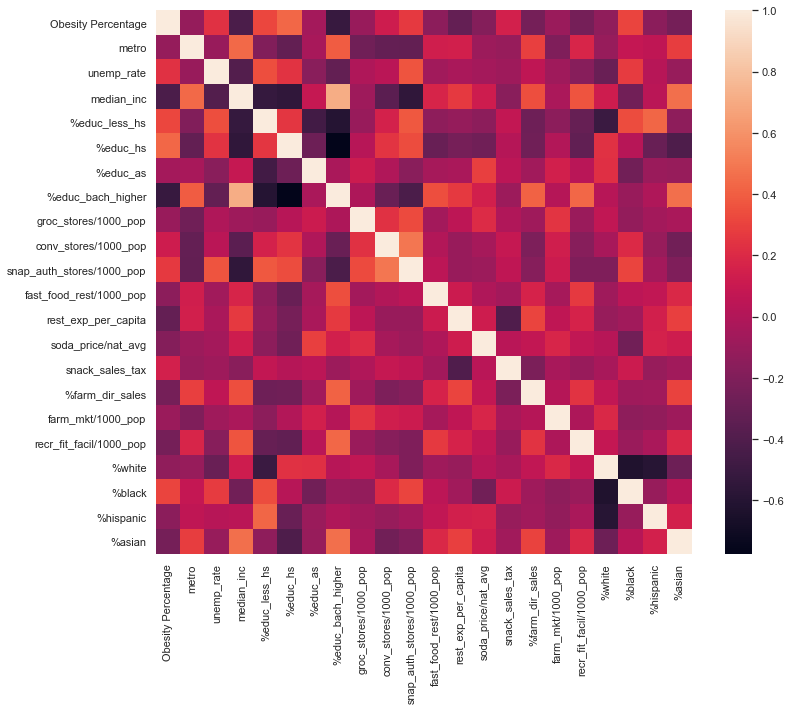

In [26]:
# Visualization for analyzing correlation among features (excluded columns: County, State, CountyFIPS)

sns.set(rc={'figure.figsize':(12, 10)})

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

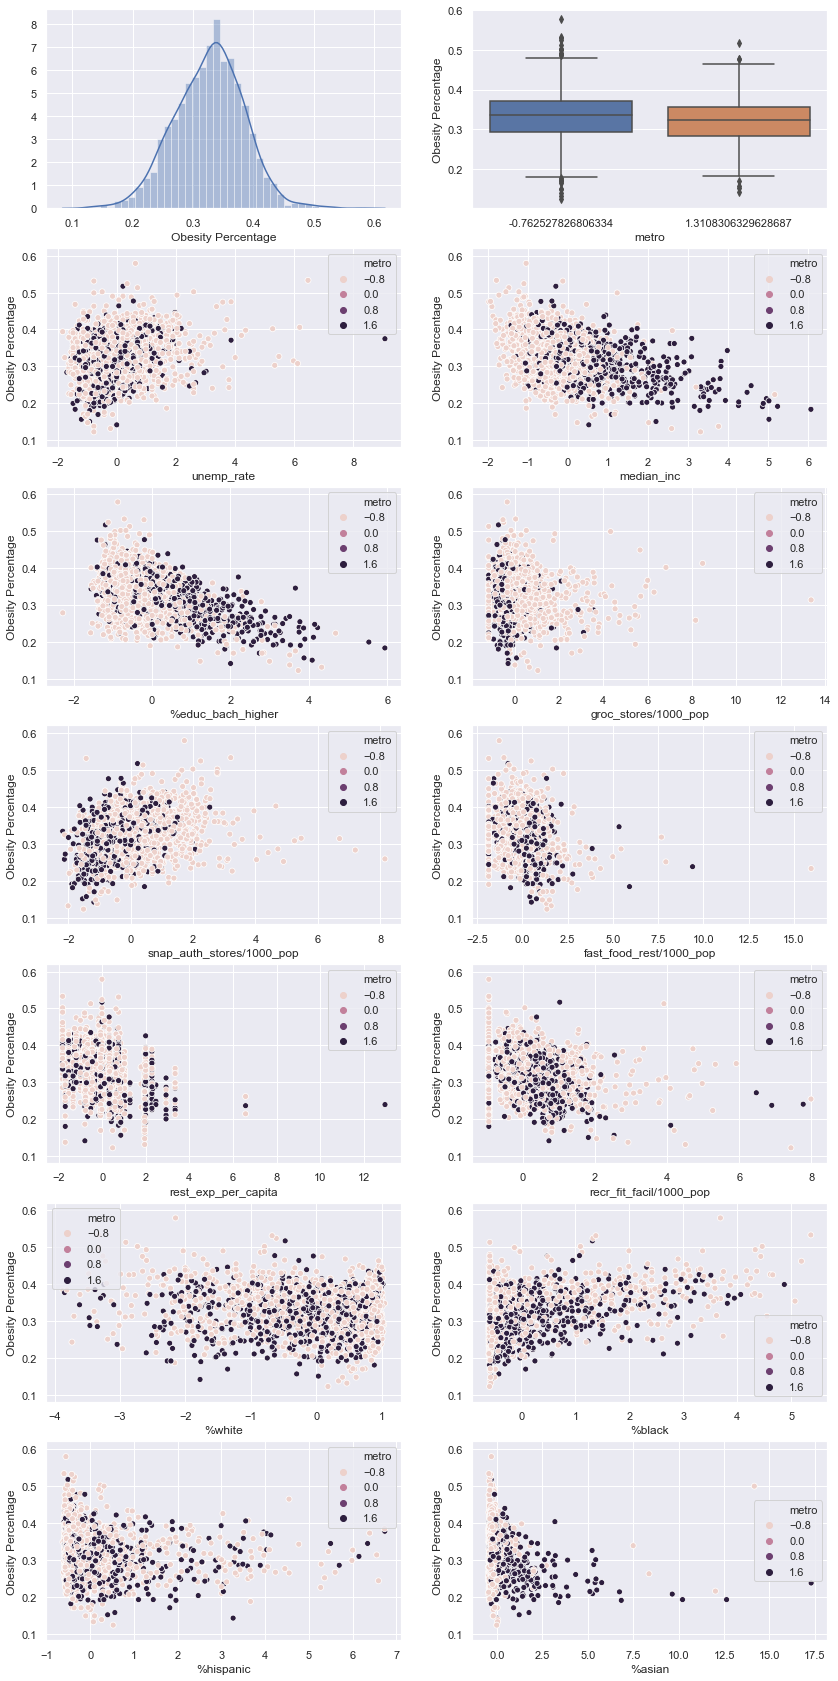

In [27]:
# Additional visualizations for analyzing correlation between target label (Obesity Percentage) and each feature

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = \
plt.subplots(nrows=7, ncols=2)


figure.set_size_inches(14, 30)

sns.distplot(final_df_train1["Obesity Percentage"], ax=ax1)
sns.boxplot(data=final_df_train1, x="metro", y="Obesity Percentage", ax=ax2)
sns.scatterplot(data=final_df_train1, x="unemp_rate", y="Obesity Percentage", hue="metro", ax=ax3)
sns.scatterplot(data=final_df_train1, x="median_inc", y="Obesity Percentage", hue="metro", ax=ax4)
sns.scatterplot(data=final_df_train1, x="%educ_bach_higher", y="Obesity Percentage", hue="metro", ax=ax5)
sns.scatterplot(data=final_df_train1, x="groc_stores/1000_pop", y="Obesity Percentage", hue="metro", ax=ax6)
sns.scatterplot(data=final_df_train1, x="snap_auth_stores/1000_pop", y="Obesity Percentage", hue="metro", ax=ax7)
sns.scatterplot(data=final_df_train1, x="fast_food_rest/1000_pop", y="Obesity Percentage", hue="metro", ax=ax8)
sns.scatterplot(data=final_df_train1, x="rest_exp_per_capita", y="Obesity Percentage", hue="metro", ax=ax9)
sns.scatterplot(data=final_df_train1, x="recr_fit_facil/1000_pop", y="Obesity Percentage", hue="metro", ax=ax10)
sns.scatterplot(data=final_df_train1, x="%white", y="Obesity Percentage", hue="metro", ax=ax11)
sns.scatterplot(data=final_df_train1, x="%black", y="Obesity Percentage", hue="metro", ax=ax12)
sns.scatterplot(data=final_df_train1, x="%hispanic", y="Obesity Percentage", hue="metro", ax=ax13)
sns.scatterplot(data=final_df_train1, x="%asian", y="Obesity Percentage", hue="metro", ax=ax14)

# 2. Training Model & Applying Test Data

We applied the following 1 non-regularized linear regression model (to serve as a basis for comparison with other regularized models) and 11 machine learning models (6 regression and 5 classification models) to predict obesity rates.

2.1    Simple OLS

2.2.   Regression models

- Random Forest
- Ridge
- Lasso
- Elastic Net
- K-Nearest Neighbor
- Gradient Boosting

2.3    Classifier models

- Random Forest
- Linear SVC
- GaussianNB
- K-Nearest Neighbor
- Gradient Boosting

## 2.1 Simple OLS

The purpose of running simple OLS (non-regularized linear regression) is for this model to serve as a basis for comparison with other regularized Machine Learning models later in the section.

In [28]:
# Run simple OLS model
ols = linear_model.LinearRegression()
ols.fit(X_train, Y_train)
Y_pred_ols = ols.predict(X_test)
r2 =  r2_score(Y_test, Y_pred_ols)
MAE = mean_absolute_error(Y_test, Y_pred_ols)
MSE = mean_squared_error(Y_test, Y_pred_ols)

In [29]:
results_ols = pd.DataFrame([['Simple OLS', 'fit_intercept: True', r2, MAE, MSE]])
results_ols.rename(columns={0: 'Model', 1: 'Parameters', 2:'R2_score', 3:'MAE', 4:'MSE'})

,Model,Parameters,R2_score,MAE,MSE
0,Simple OLS,fit_intercept: True,0.389364,0.034506,0.001913


# 2.2 Regression models

The following six machine learning regression models were run with various parameters to predict obesity rates, which are then converted into categories at a later point in 3.3 Evaluation section. This section runs various regression models in one-go. Please refer to individual sub-sections for further details.

- Random Forest
- Ridge
- Lasso
- Elastic Net
- K-Nearest Neighbor
- Gradient Boosting

In [30]:
### MODELS ###
MODELS_regs = {
    'Random Forest': RandomForestRegressor(),
    'Ridge': linear_model.Ridge(),
    'Lasso': linear_model.Lasso(),
    'Elastic Net': linear_model.ElasticNet(),
    'K-Nearest Neighbor': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
    }

In [31]:
### GRID ###

GRID_regs = {
    'Ridge': [{'alpha': [0.1, 0.5, 1.0, 10.0]}],
    'Lasso': [{'alpha': [0.1, 0.5, 1.0, 10.0]}],
    'Elastic Net': [{'alpha': [0.1, 0.5, 1.0, 10.0]}],
    'K-Nearest Neighbor': [{'n_neighbors': [x for x in range(1, 30)]} ],
    'Random Forest': [{'n_estimators': [100, 200], 'max_features':[b for b in range(3, X_test.shape[1]+1)],
                       'random_state':[seed], 'n_jobs':[1], 'max_depth':[50],
                       'min_samples_split':[2 ,3]}],
    'Gradient Boosting': [{'n_estimators': [50, 100], 'max_features':[a for a in range(3, X_test.shape[1]+1)],
                           'random_state':[seed], 'min_samples_split':[3, 50, 100], 'max_depth':[3, 10]}]
}

cv = 5

In [32]:
TYPE = 'regression'
results_regs = pl.build_apply_model(X_train, Y_train, X_test, Y_test, MODELS_regs, GRID_regs, TYPE, cv)

Training model: Random Forest
best score | 0.4384791906349056 best params | {'max_depth': 50, 'max_features': 6, 'min_samples_split': 3, 'n_estimators': 200, 'n_jobs': 1, 'random_state': 10}
Training model: Ridge
best score | 0.3862314837930026 best params | {'alpha': 10.0}
Training model: Lasso
best score | -0.005884314035064442 best params | {'alpha': 0.1}
Training model: Elastic Net
best score | -0.005884314035064442 best params | {'alpha': 0.1}
Training model: K-Nearest Neighbor
best score | 0.3661275522817547 best params | {'n_neighbors': 25}
Training model: Gradient Boosting
best score | 0.43516207289532727 best params | {'max_depth': 3, 'max_features': 4, 'min_samples_split': 50, 'n_estimators': 100, 'random_state': 10}
Time Elapsed: 0:21:34.247344


In [33]:
results_regs_sorted = results_regs.sort_values('R2_score', ascending=False)
results_regs_sorted

,Model,Parameters,R2_score,MAE,MSE,best_model
0,Random Forest,"{'max_depth': 50, 'max_features': 6, 'min_samp...",0.460500,0.031971,0.001690,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
5,Gradient Boosting,"{'max_depth': 3, 'max_features': 4, 'min_sampl...",0.445780,0.032445,0.001736,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
1,Ridge,{'alpha': 10.0},0.391720,0.034422,0.001906,"Ridge(alpha=10.0, copy_X=True, fit_intercept=T..."
4,K-Nearest Neighbor,{'n_neighbors': 25},0.390366,0.034225,0.001910,"KNeighborsRegressor(algorithm='auto', leaf_siz..."
2,Lasso,{'alpha': 0.1},-0.001746,0.045241,0.003138,"Lasso(alpha=0.1, copy_X=True, fit_intercept=Tr..."
3,Elastic Net,{'alpha': 0.1},-0.001746,0.045241,0.003138,"ElasticNet(alpha=0.1, copy_X=True, fit_interce..."


In [34]:
# Best parameter combinations and results for the highest R-squared model
pl.summarize_best_model_result(results_regs_sorted.iloc[:,:-1])

Model :  Random Forest
Parameters :  {'max_depth': 50, 'max_features': 6, 'min_samples_split': 3, 'n_estimators': 200, 'n_jobs': 1, 'random_state': 10}
R2_score :  0.46049977128836594
MAE :  0.03197103096593781
MSE :  0.0016900815913637303


The average R2_score of the best Random Forest Model in the cross validation process is 0.4385(shown in [32]), which is lower than the R2_score with the test set(0.4605), so the model does not overfit to the training set.

In [35]:
best_model_reg = results_regs_sorted.iloc[0,-1]
best_model_reg

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=1, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

As seen above in the results table, Random Forest regression model produced the highest R-squared score. In the below 3.3 Evaluation section for comparison of models, this Random Forest momdel will be used for further analysis.

# 2.3 Classification models

The following five machine learning classification models were run with various parameters to predict obesity classifiers. This section is comprised of two sub-sections, where each sub-section utilized different ways of splitting the label categories. Please refer to individual sub-sections for further details.

- Random Forest
- Linear SVC
- GaussianNB
- K-Nearest Neighbor
- Gradient Boosting

# 2.3.1 Classification with range of values considered for category split
The range of obesity percentage values (difference between minimum and maximum) was considered to split into categories, where the value that marked 1/3 of the range was chosen as the boundary for splitting observations between low (g1) and medium (g2) categories, and the value that marked 2/3 of the range was chosen as the boundary for splitting observations between medium (g2) and high (g3) categories.

In [36]:
n = 3
label = 'Obesity Percentage'
Y_train_cat = pl.categorize_col_by_n_groups(final_df_train1_n, label, n, final_df_train1_n['Obesity Percentage'].min(), \
                                            final_df_train1_n['Obesity Percentage'].max())
Y_test_cat = pl.categorize_col_by_n_groups(final_df_test1_n, label, n, final_df_train1_n['Obesity Percentage'].min(), \
                                           final_df_train1_n['Obesity Percentage'].max())

In [37]:
Y_train_cat.value_counts()

g2    1706
g1     417
g3      74
Name: Obesity Percentage, dtype: int64

In [38]:
Y_test_cat.value_counts()

g2    747
g1    160
g3     35
Name: Obesity Percentage, dtype: int64

In [39]:
### MODELS
MODELS = {
    'Random Forest': RandomForestClassifier(),
    'Linear SVC': SVC(),
    'GaussianNB': GaussianNB(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
    }

In [40]:
### GRID ###
GRID = {
    'GaussianNB': [{'priors': [None]}],
    'Linear SVC': [{'kernel': ['linear'], 'C': [0.1, 1.0],\
                    'gamma':[0.1, 1.0, 10.0], 'random_state': [seed]}],
    'K-Nearest Neighbor': [{'n_neighbors': [x for x in range(1, 30)]}],
    'Random Forest': [{'n_estimators': [100, 300], 'max_features':[a for a in range(3, X_test.shape[1]+1)],\
                       'random_state':[seed], 'n_jobs':[1], 'max_depth':[30], 'min_samples_split':[2, 3]}],
    'Gradient Boosting': [{'n_estimators': [50, 100], 'max_features':[a for a in range(3, X_train.shape[1]+1)],\
                           'random_state':[seed],\
                           'min_samples_split':[50, 100], 'max_depth':[10], 'min_samples_leaf':[5, 10]}]
}

cv = 5

In [41]:
TYPE = 'classifier'
results = pl.build_apply_model(X_train, Y_train_cat, X_test, Y_test_cat, MODELS, GRID, TYPE, cv)

Training model: Random Forest
best score | 0.8284044315593292 best params | {'max_depth': 30, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 300, 'n_jobs': 1, 'random_state': 10}
Training model: Linear SVC
best score | 0.8206688755435907 best params | {'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 10}
Training model: GaussianNB
best score | 0.7096106854421205 best params | {'priors': None}
Training model: K-Nearest Neighbor
best score | 0.8211348105197762 best params | {'n_neighbors': 8}
Training model: Gradient Boosting
best score | 0.8288600124249326 best params | {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 100, 'n_estimators': 50, 'random_state': 10}
Time Elapsed: 0:52:46.428957


In [42]:
results_cls_sorted = results.sort_values('Accuracy Score', ascending=False)
results_cls_sorted

,Model,Parameters,Accuracy Score,Precision Score,Recall Score,best_model
4,Gradient Boosting,"{'max_depth': 10, 'max_features': 3, 'min_samp...",0.852442,0.712026,0.504171,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
0,Random Forest,"{'max_depth': 30, 'max_features': 3, 'min_samp...",0.848195,0.556409,0.466223,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
3,K-Nearest Neighbor,{'n_neighbors': 8},0.830149,0.509250,0.457000,"KNeighborsClassifier(algorithm='auto', leaf_si..."
1,Linear SVC,"{'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', '...",0.825902,0.543694,0.414288,"SVC(C=1.0, break_ties=False, cache_size=200, c..."
2,GaussianNB,{'priors': None},0.728238,0.520315,0.628456,"GaussianNB(priors=None, var_smoothing=1e-09)"


In [43]:
# Best parameter combinations and results for the highest accuracy model
pl.summarize_best_model_result(results_cls_sorted.iloc[:,:-1])

Model :  Gradient Boosting
Parameters :  {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 100, 'n_estimators': 50, 'random_state': 10}
Accuracy Score :  0.8524416135881104
Precision Score :  0.7120255036256314
Recall Score :  0.5041714476955441


The average Accuracy Score of the best Gradient Boosting model in the cross validation is 0.8289(shown in [41]), which is lower than the Accuracy Score with the test set(0.85244), so the model does not overfit to the training set.

In [44]:
best_model_cls = results_cls_sorted.iloc[0, -1]
best_model_cls

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=100,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

As seen above in the results table, Gradient Boosting classification model produced the highest accuracy score with fairly high precision and recall scores when the range of obesity percentage values (difference between minimum and maximum) was considered for splitting label categories. In the below 3.3 Evaluation section for comparison of models, this Gradient Boosting model will be used for further analysis.

# 2.3.2 Classification with equal number of observations in each classifier
Observations were split into categories based on their percentile values (e.g., observations within the lowest 33.3th percentile categorized as low (g1), 33.3th and 66.7% categorized as medium (g2, and the highest 33.3th percentile categorized as high (g3)

In [45]:
new_Y_train_cat =  pl.categorize_col_equally_by_n_groups(final_df_train1_n, label, n)
new_Y_test_cat =  pl.categorize_col_equally_by_n_groups(final_df_test1_n, label, n)

In [46]:
new_Y_train_cat.head(5)

2630    g1
193     g1
1668    g1
2134    g2
3011    g3
Name: Obesity Percentage, dtype: category
Categories (3, object): [g1 < g2 < g3]

In [47]:
new_Y_train_cat.value_counts()

g1    742
g2    731
g3    724
Name: Obesity Percentage, dtype: int64

In [48]:
new_Y_test_cat.value_counts()

g2    318
g1    314
g3    310
Name: Obesity Percentage, dtype: int64

In [49]:
TYPE = 'classifier'
cv = 5
new_results = pl.build_apply_model(X_train, new_Y_train_cat, X_test, new_Y_test_cat, MODELS, GRID, TYPE, cv)

Training model: Random Forest
best score | 0.5908138330917374 best params | {'max_depth': 30, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 300, 'n_jobs': 1, 'random_state': 10}
Training model: Linear SVC
best score | 0.545294056740526 best params | {'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 10}
Training model: GaussianNB
best score | 0.5393725408987369 best params | {'priors': None}
Training model: K-Nearest Neighbor
best score | 0.5434810519776352 best params | {'n_neighbors': 7}
Training model: Gradient Boosting
best score | 0.5803406502381445 best params | {'max_depth': 10, 'max_features': 13, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 100, 'random_state': 10}
Time Elapsed: 0:47:19.324750


In [50]:
new_results_cls_sorted = new_results.sort_values('Accuracy Score', ascending=False)
new_results_cls_sorted

,Model,Parameters,Accuracy Score,Precision Score,Recall Score,best_model
4,Gradient Boosting,"{'max_depth': 10, 'max_features': 13, 'min_sam...",0.567941,0.568528,0.568730,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
0,Random Forest,"{'max_depth': 30, 'max_features': 3, 'min_samp...",0.560510,0.558993,0.561582,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
1,Linear SVC,"{'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', '...",0.544586,0.541220,0.545561,"SVC(C=1.0, break_ties=False, cache_size=200, c..."
2,GaussianNB,{'priors': None},0.540340,0.561034,0.540901,"GaussianNB(priors=None, var_smoothing=1e-09)"
3,K-Nearest Neighbor,{'n_neighbors': 7},0.532909,0.533722,0.533668,"KNeighborsClassifier(algorithm='auto', leaf_si..."


In [51]:
# Best parameter combinations and results for the highest accuracy model
best_cls_equal = pl.summarize_best_model_result(new_results_cls_sorted.iloc[:,:-1])
best_cls_equal

Model :  Gradient Boosting
Parameters :  {'max_depth': 10, 'max_features': 13, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 100, 'random_state': 10}
Accuracy Score :  0.5679405520169851
Precision Score :  0.5685278454969619
Recall Score :  0.5687298492090874


The average Accuracy Score of the best Gradient Boosting model in the cross validation is 0.58034(shown in [49]), which is not significantly higher than the Accuracy Score with the test set(0.5679), so the model does not overfit to the training set.

In [52]:
best_model_cls_2 = new_results_cls_sorted.iloc[0, -1]
best_model_cls_2

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=13, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=50,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Gradient Boosting classification model with the above parameters produced the highest accuracy score when observations were split into categories based on their percentile values. Comparing evaluation metrics among the best classification models in two different label splitting methods, the former Gradient Boosting model from 2.3.1 section produced far better accuracy and precision scores at the expense of slight recall score. Therfore, we will be using the Gradient Boosting classification model from 2.3.1 section for further analysis in the following 3. Evaluation section.

## 3. Evaluation

This section summarizes the prediction results of the best models from the above section and evaluates them among each other, as well as compares them to the basis Simple OLS model.

## 3.1 Evaluation: Regression models

Machine learning models using regression are analyzed under this section, focusing on the bias-variance trade-off.

In [53]:
# Sort by Model type with maximum R2_score
by_R2 = results_regs_sorted[['Model', 'R2_score', 'MAE', 'MSE']]
by_R2.set_index('Model', inplace=True)
by_R2

,R2_score,MAE,MSE
Model,,,
Random Forest,0.460500,0.031971,0.001690
Gradient Boosting,0.445780,0.032445,0.001736
Ridge,0.391720,0.034422,0.001906
K-Nearest Neighbor,0.390366,0.034225,0.001910
Lasso,-0.001746,0.045241,0.003138
Elastic Net,-0.001746,0.045241,0.003138


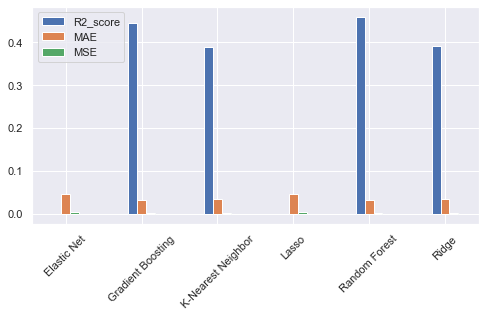

In [54]:
# Plot visualization for evaluating bias-variance tradeoff

by_R2 = results_regs[['Model', 'R2_score', 'MAE', 'MSE']].loc[results_regs.groupby('Model')['R2_score'].idxmax()]
by_R2.set_index('Model', inplace=True)
plt.rcParams['figure.figsize'] = [8, 4]

labels = by_R2.index.values
x = np.arange(len(labels))
width = 0.35  

fix, ax = plt.subplots()
rects = ax.bar(x - width/3, by_R2['R2_score'], width/3, label='R2_score')
rects = ax.bar(x, by_R2['MAE'], width/3, label='MAE')
rects = ax.bar(x + width/3, by_R2['MSE'], width/3, label='MSE')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.show()

In [55]:
best_reg = best_model_reg.fit(X_train, Y_train)
Y_pred_reg = best_reg.predict(X_test)

In [56]:
best_reg_importances = best_reg.feature_importances_
best_reg_importance_df = pd.DataFrame({'features': X_train.columns,
                                       'importance': best_reg_importances})
best_reg_importance_df =  best_reg_importance_df.sort_values(by='importance', ascending=False)
best_reg_importance_df.head(5)

,features,importance
6,%educ_bach_higher,0.134990
4,%educ_hs,0.099315
18,%black,0.083654
11,rest_exp_per_capita,0.074345
2,median_inc,0.059308


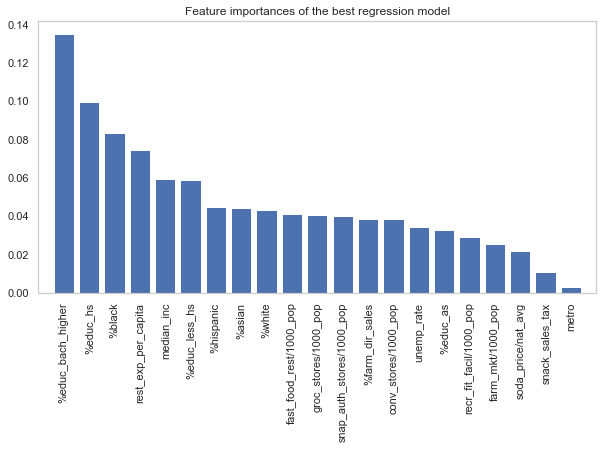

In [57]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title("Feature importances of the best regression model")
plt.bar(range(X_train.shape[1]),  best_reg_importance_df['importance'], align="center")
plt.xticks(range(X_train.shape[1]),  best_reg_importance_df['features'], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## 3.2 Evaluation: Classification models

Evaluation results for machine learning models using classification analysis are described under this section, focusing on feature importance, precision, accuracy and recall.

In [58]:
best_model_cls = results_cls_sorted.iloc[0, -1]
Y_pred_cls = best_model_cls.predict(X_test)

In [59]:
importances = best_model_cls.feature_importances_
importance_df = pd.DataFrame({'features': X_train.columns,
                              'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)
importance_df.head(5)

,features,importance
4,%educ_hs,0.119383
6,%educ_bach_higher,0.119034
11,rest_exp_per_capita,0.082469
2,median_inc,0.055804
10,fast_food_rest/1000_pop,0.055279


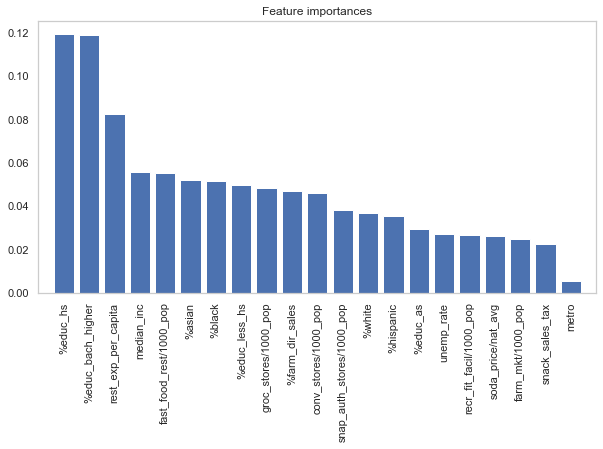

In [60]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importance_df['importance'], align="center")
plt.xticks(range(X_train.shape[1]), importance_df['features'], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

[[ 78  81   1]
 [ 23 723   1]
 [  0  33   2]]


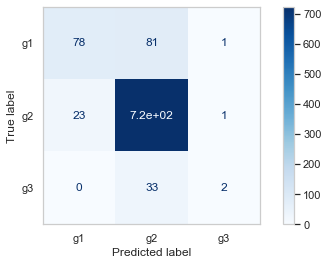

In [61]:
plot_confusion_matrix(best_model_cls, X_test, Y_test_cat, cmap=plt.cm.Blues)
print(metrics.confusion_matrix(Y_test_cat, Y_pred_cls))

In [62]:
print("Precision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}\n".
      format(round(metrics.precision_score(Y_test_cat, Y_pred_cls, average='macro'), 2),
             round(metrics.recall_score(Y_test_cat, Y_pred_cls, average='macro'), 2),
             round(metrics.f1_score(Y_test_cat, Y_pred_cls, average='macro'), 2)))

Precision:	0.71
Recall:		0.5
F1 Score:	0.54



## 3.3 Evaluation - OLS vs. Regression vs. Classification

This section represents overall comparison of models: OLS vs. Best Regression Model vs. Best Classification Model

In [63]:
summary_table = pd.DataFrame(Y_pred_ols)
summary_table = summary_table.rename(columns={0: 'OLS_val'})
summary_table['OLS_cat'] = pl.categorize_col_by_n_groups(summary_table, 'OLS_val', n,\
                                                         final_df_train1_n['Obesity Percentage'].min(),
                                                         final_df_train1_n['Obesity Percentage'].max())
summary_table['reg_val'] = pd.DataFrame(Y_pred_reg)
summary_table['reg_cat'] = pl.categorize_col_by_n_groups(summary_table, 'reg_val', n,\
                                                         final_df_train1_n['Obesity Percentage'].min(),
                                                         final_df_train1_n['Obesity Percentage'].max())
summary_table['cls_cat'] = pd.DataFrame(Y_pred_cls)
summary_table['TRUE_cat'] = pd.DataFrame(Y_test_cat).reset_index()['Obesity Percentage']
summary_table_final = summary_table[['OLS_cat', 'reg_cat', 'cls_cat', 'TRUE_cat']]
summary_table_final.head(5)

,OLS_cat,reg_cat,cls_cat,TRUE_cat
0,g2,g2,g2,g2
1,g2,g2,g2,g1
2,g2,g2,g2,g2
3,g2,g2,g2,g1
4,g2,g2,g2,g1


In [64]:
pl.obtain_match_rate(summary_table_final, ['OLS_cat', 'reg_cat', 'cls_cat'], 'TRUE_cat')

OLS_cat :  0.84
reg_cat :  0.84
cls_cat :  0.85


Although our best regression and classification models perform fairly well in predicting obesity rates, when the number of matches vs mismatches were compared with the true test data, only the best classification model performed slightly better than simple OLS.

In [148]:
ind = ['True_g1', 'True_g2', 'True_g3']

OLS_df = pd.DataFrame(summary_table_final.groupby(['TRUE_cat', 'OLS_cat']).count()['reg_cat'].
                      values.reshape(3,3), columns=['OLS_g1', 'OLS_g2', 'OLS_g3'], index=ind)
reg_df = pd.DataFrame(summary_table_final.groupby(['TRUE_cat', 'reg_cat']).count()['OLS_cat'].
                      values.reshape(3,3), columns=['reg_g1', 'reg_g2', 'reg_g3'], index=ind)
cls_df = pd.DataFrame(summary_table_final.groupby(['TRUE_cat', 'cls_cat']).count()['reg_cat'].
                      values.reshape(3,3), columns=['cls_g1', 'cls_g2', 'cls_g3'], index=ind)

In [153]:
OLS_df = OLS_df.fillna(0)
reg_df = reg_df.fillna(0)
cls_df = cls_df.fillna(0)

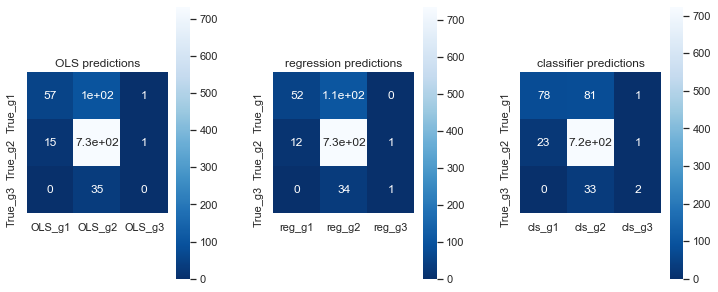

In [188]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
sns.heatmap(OLS_df, annot=True,square=True,cmap='Blues_r', ax=axes[0])
sns.heatmap(reg_df, annot=True,square=True,cmap='Blues_r', ax=axes[1])
sns.heatmap(cls_df, annot=True,square=True,cmap='Blues_r', ax=axes[2])

axes[0].set_title('OLS predictions')
axes[1].set_title('regression predictions')
axes[2].set_title('classifier predictions')

plt.subplots_adjust(wspace=0.4)

Our three best models can predict True g2 more correctly than True g1 and True g3. They are inclined to regard True g1 as g2(over-predicting), and True g3 as g2(under-predicting).

# 4. Further Appliction: Predicting Coronavirus

This section explores applying the learnings from previous section towards predicting Coronavirus death rates. We used Coronavirus data updated as of June 1st, 2020.

We applied the following 11 machine learning models (6 regression and 5 classification models).

4.2.   Regression models (ML)

- Random Forest
- Ridge
- Lasso
- Elastic Net
- K-Nearest Neighbor
- Gradient Boosting

4.3    Classifier models (ML)

- Random Forest
- Linear SVC
- GaussianNB
- K-Nearest Neighbor
- Gradient Boosting

## 4.1.1 Data Gathering (incl. merging into a single dataframe)

Merge Coronavirus data with obesity, demographics, health and lifestyle features from previous section to apply Machine Learning models.

In [65]:
# Load covid-19 data
covid_df = pd.read_csv('covid.csv')
covid_df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [66]:
# Obtain the latest covid-19 observations (observations in data are cumulative)
covid = covid_df.groupby('fips').max()
covid_newdf = covid.reset_index()
covid_newdf['fips'] = covid_newdf['fips'].astype(int)
covid_newdf.head(5)

,fips,date,county,state,cases,deaths
0,1001,2020-06-01,Autauga,Alabama,234,5
1,1003,2020-06-01,Baldwin,Alabama,306,9
2,1005,2020-06-01,Barbour,Alabama,173,1
3,1007,2020-06-01,Bibb,Alabama,79,1
4,1009,2020-06-01,Blount,Alabama,65,1


In [67]:
# Merge obesity and covid-19 data
obesity_covid = obesity_df2.merge(covid_newdf, left_on='CountyFIPS', right_on='fips').drop(columns={
    'fips', 'date', 'county', 'state'})
obesity_covid.head(5)

,County,State,CountyFIPS,Percentage,cases,deaths
0,Autauga County,Alabama,1001,33.2,234,5
1,Baldwin County,Alabama,1003,31.1,306,9
2,Barbour County,Alabama,1005,41.7,173,1
3,Bibb County,Alabama,1007,37.7,79,1
4,Blount County,Alabama,1009,33.7,65,1


In [68]:
# Load population data
totpop_df = pd.read_csv('total_population.csv')
totpop_df.head(5)

,GEO_ID,NAME,B01003_001E
0,0500000US18081,"Johnson County, Indiana",147567
1,0500000US18083,"Knox County, Indiana",37956
2,0500000US18085,"Kosciusko County, Indiana",78461
3,0500000US18087,"LaGrange County, Indiana",38395
4,0500000US18089,"Lake County, Indiana",489698


In [69]:
# Convert columns to appropriate data types
totpop_df['GEO_ID'] = totpop_df['GEO_ID'].astype(str)
totpop_df['CountyFIPS'] = totpop_df['GEO_ID'].str.slice(start=9)
totpop_df['CountyFIPS'] = totpop_df['CountyFIPS'].astype(int)
totpop_df.head(5)

,GEO_ID,NAME,B01003_001E,CountyFIPS
0,0500000US18081,"Johnson County, Indiana",147567,18081
1,0500000US18083,"Knox County, Indiana",37956,18083
2,0500000US18085,"Kosciusko County, Indiana",78461,18085
3,0500000US18087,"LaGrange County, Indiana",38395,18087
4,0500000US18089,"Lake County, Indiana",489698,18089


In [70]:
# Merge obesity and covid-19 data
obesity_covid_finaldf = obesity_covid.merge(totpop_df).drop(columns={'GEO_ID', 'NAME'})
obesity_covid_finaldf = obesity_covid_finaldf.rename(columns={'Percentage': 'obesity%', 'cases': 'covid_cases', 
                                                              'deaths': 'covid_deaths', 'B01003_001E': 'total_pop'})
obesity_covid_finaldf.head(5)

,County,State,CountyFIPS,obesity%,covid_cases,covid_deaths,total_pop
0,Autauga County,Alabama,1001,33.2,234,5,55049
1,Baldwin County,Alabama,1003,31.1,306,9,199510
2,Barbour County,Alabama,1005,41.7,173,1,26614
3,Bibb County,Alabama,1007,37.7,79,1,22572
4,Blount County,Alabama,1009,33.7,65,1,57704


In [71]:
# Add covid-19 infection and death percentage features by dividing the number of infections and deaths by total population
obesity_covid_finaldf['covid_case%'] = obesity_covid_finaldf['covid_cases'] / obesity_covid_finaldf['total_pop'] * 100
obesity_covid_finaldf['covid_death%'] = obesity_covid_finaldf['covid_deaths'] / obesity_covid_finaldf['total_pop'] * 100
obesity_covid_finaldf['obesity%'] = obesity_covid_finaldf['obesity%'].astype(float)
obesity_covid_finaldf.head(5)

,County,State,CountyFIPS,obesity%,covid_cases,covid_deaths,total_pop,covid_case%,covid_death%
0,Autauga County,Alabama,1001,33.2,234,5,55049,0.425076,0.009083
1,Baldwin County,Alabama,1003,31.1,306,9,199510,0.153376,0.004511
2,Barbour County,Alabama,1005,41.7,173,1,26614,0.650034,0.003757
3,Bibb County,Alabama,1007,37.7,79,1,22572,0.349991,0.004430
4,Blount County,Alabama,1009,33.7,65,1,57704,0.112644,0.001733


In [72]:
# Merge dataframes
covid_df = final_df.merge(obesity_covid_finaldf[['CountyFIPS', 'covid_death%']], on='CountyFIPS')
covid_df = covid_df.rename(columns={'Obesity Percentage': '%obesity'})
covid_df.head()

,County,State,CountyFIPS,%obesity,metro,unemp_rate,median_inc,%educ_less_hs,%educ_hs,%educ_as,...,soda_price/nat_avg,snack_sales_tax,%farm_dir_sales,farm_mkt/1000_pop,recr_fit_facil/1000_pop,%white,%black,%hispanic,%asian,covid_death%
0,Autauga County,Alabama,1001,0.332,1.0,3.6,59338,11.3,32.6,28.4,...,0.972216,4.0,13.110540,0.018045,0.090261,77.246156,17.582599,2.400542,0.855766,0.009083
1,Baldwin County,Alabama,1003,0.311,1.0,3.6,57588,9.7,27.6,31.3,...,1.001391,4.0,10.414560,0.019179,0.124931,83.504787,9.308425,4.384824,0.735193,0.004511
2,Barbour County,Alabama,1005,0.417,0.0,5.2,34382,27.0,35.7,25.1,...,0.992584,4.0,2.276708,0.154054,0.000000,46.753105,46.691190,5.051535,0.389700,0.003757
3,Bibb County,Alabama,1007,0.377,1.0,4.0,46064,16.8,47.3,24.4,...,0.972216,4.0,6.878307,0.044164,0.044433,75.020729,21.924504,1.771765,0.096007,0.004430
4,Blount County,Alabama,1009,0.337,1.0,3.5,50412,19.8,34.0,33.5,...,0.972216,4.0,7.091056,0.017330,0.051976,88.887338,1.263040,8.070200,0.200621,0.001733


In [73]:
covid_df.shape

(2965, 26)

In [74]:
pl.find_min_max(covid_df, list(covid_df.columns)[3:])

(%obesity                         0.123000
 metro                            0.000000
 unemp_rate                       1.300000
 median_inc                   25385.000000
 %educ_less_hs                    1.200000
 %educ_hs                         5.500000
 %educ_as                        11.400000
 %educ_bach_higher                5.400000
 groc_stores/1000_pop             0.000000
 conv_stores/1000_pop             0.000000
 snap_auth_stores/1000_pop        0.118901
 fast_food_rest/1000_pop          0.000000
 rest_exp_per_capita            439.731454
 soda_price/nat_avg               0.900997
 snack_sales_tax                  0.000000
 %farm_dir_sales                  0.000000
 farm_mkt/1000_pop                0.000000
 recr_fit_facil/1000_pop          0.000000
 %white                           2.860408
 %black                           0.000000
 %hispanic                        0.190644
 %asian                           0.000000
 covid_death%                     0.000000
 dtype: flo

## 4.1.2 Data Cleaning/Analysis & Preparation of Train/Test Data

Impute missing values with median, normalize variables to remove different scaling effects.

In [75]:
# Split data frame
seed = 10
covid_train, covid_test = pipeline.create_train_test(dataframe=covid_df, test_split_size=0.2, rand_state=seed)

In [76]:
# Impute missing values.
pipeline.impute_missing_values_train(covid_train, 
                                    ['%obesity','metro', 'unemp_rate', 'median_inc',
                                     'groc_stores/1000_pop', 'conv_stores/1000_pop',
                                     'snap_auth_stores/1000_pop', 'fast_food_rest/1000_pop',
                                     'rest_exp_per_capita', 'soda_price/nat_avg', 'snack_sales_tax',
                                     '%farm_dir_sales', 'farm_mkt/1000_pop', 'recr_fit_facil/1000_pop',
                                     '%educ_less_hs', '%educ_hs', '%educ_as','%educ_bach_higher',
                                     '%white', '%black', '%hispanic', '%asian'])

pipeline.impute_missing_values_test(covid_train, covid_test, 
                                    ['%obesity','metro', 'unemp_rate', 'median_inc',
                                     'groc_stores/1000_pop', 'conv_stores/1000_pop',
                                     'snap_auth_stores/1000_pop', 'fast_food_rest/1000_pop',
                                     'rest_exp_per_capita', 'soda_price/nat_avg', 'snack_sales_tax',
                                     '%farm_dir_sales', 'farm_mkt/1000_pop', 'recr_fit_facil/1000_pop',
                                     '%educ_less_hs', '%educ_hs', '%educ_as','%educ_bach_higher',
                                     '%white', '%black', '%hispanic', '%asian'])

In [77]:
# Sanity check for missing values in training data after imputation (total number of missing value observations)
covid_train.isnull().sum()

County                       0
State                        0
CountyFIPS                   0
%obesity                     0
metro                        0
unemp_rate                   0
median_inc                   0
%educ_less_hs                0
%educ_hs                     0
%educ_as                     0
%educ_bach_higher            0
groc_stores/1000_pop         0
conv_stores/1000_pop         0
snap_auth_stores/1000_pop    0
fast_food_rest/1000_pop      0
rest_exp_per_capita          0
soda_price/nat_avg           0
snack_sales_tax              0
%farm_dir_sales              0
farm_mkt/1000_pop            0
recr_fit_facil/1000_pop      0
%white                       0
%black                       0
%hispanic                    0
%asian                       0
covid_death%                 0
dtype: int64

In [78]:
covid_test.isnull().sum()

County                       0
State                        0
CountyFIPS                   0
%obesity                     0
metro                        0
unemp_rate                   0
median_inc                   0
%educ_less_hs                0
%educ_hs                     0
%educ_as                     0
%educ_bach_higher            0
groc_stores/1000_pop         0
conv_stores/1000_pop         0
snap_auth_stores/1000_pop    0
fast_food_rest/1000_pop      0
rest_exp_per_capita          0
soda_price/nat_avg           0
snack_sales_tax              0
%farm_dir_sales              0
farm_mkt/1000_pop            0
recr_fit_facil/1000_pop      0
%white                       0
%black                       0
%hispanic                    0
%asian                       0
covid_death%                 0
dtype: int64

In [79]:
# Normalize features for training data
covid_train_n = pipeline.normalize_train(covid_train, [
    '%obesity', 'metro', 'unemp_rate', 'median_inc',
    'groc_stores/1000_pop', 'conv_stores/1000_pop',
    'snap_auth_stores/1000_pop', 'fast_food_rest/1000_pop',
    'rest_exp_per_capita', 'soda_price/nat_avg', 'snack_sales_tax',
    '%farm_dir_sales', 'farm_mkt/1000_pop', 'recr_fit_facil/1000_pop',
    '%educ_less_hs', '%educ_hs', '%educ_as','%educ_bach_higher',
    '%white', '%black', '%hispanic', '%asian'])

# Normalize features for test data
covid_test_n = pipeline.normalize_test(covid_train, covid_test,[
    '%obesity', 'metro', 'unemp_rate', 'median_inc',
    'groc_stores/1000_pop', 'conv_stores/1000_pop',
    'snap_auth_stores/1000_pop', 'fast_food_rest/1000_pop',
    'rest_exp_per_capita', 'soda_price/nat_avg', 'snack_sales_tax',
    '%farm_dir_sales', 'farm_mkt/1000_pop', 'recr_fit_facil/1000_pop',
    '%educ_less_hs', '%educ_hs', '%educ_as','%educ_bach_higher',
    '%white', '%black', '%hispanic', '%asian'])

In [80]:
covid_train_n.head()

,County,State,CountyFIPS,%obesity,metro,unemp_rate,median_inc,%educ_less_hs,%educ_hs,%educ_as,...,soda_price/nat_avg,snack_sales_tax,%farm_dir_sales,farm_mkt/1000_pop,recr_fit_facil/1000_pop,%white,%black,%hispanic,%asian,covid_death%
48,Mobile County,Alabama,1097,0.649781,1.241647,0.392270,-0.674173,0.049030,-0.096922,-0.146883,...,0.210447,1.431831,0.820400,-0.512980,0.017934,-0.955797,1.719878,-0.450032,0.278135,0.028482
2697,Goochland County,Virginia,51075,-1.141952,1.241647,-0.791350,2.578128,-0.700458,-1.166031,-0.899168,...,-1.512125,0.194941,0.198146,0.921893,-1.014717,-0.080191,0.676493,-0.473329,-0.061137,0.027299
1768,Tioga County,New York,36107,0.348202,1.241647,0.183396,0.514229,-0.684511,0.259447,-0.265665,...,-0.565003,-0.547194,1.671966,0.077144,-0.155128,0.916249,-0.577568,-0.528638,-0.179674,0.036255
2482,Hill County,Texas,48217,-0.077556,-0.805043,-0.373602,-0.313478,0.654998,0.053850,0.011493,...,0.210447,-0.547194,-0.667104,-0.656750,-0.194627,-0.218332,-0.204986,0.742900,-0.358445,0.002865
2806,Skagit County,Washington,53057,-0.645234,1.241647,0.740393,1.271319,-0.509100,-1.083792,1.298296,...,4.329879,-0.547194,2.304548,-0.174532,0.528590,-0.061621,-0.586765,0.633678,0.242302,0.012451


In [81]:
covid_train_n.shape

(2372, 26)

In [82]:
covid_test_n.head()

,County,State,CountyFIPS,%obesity,metro,unemp_rate,median_inc,%educ_less_hs,%educ_hs,%educ_as,...,soda_price/nat_avg,snack_sales_tax,%farm_dir_sales,farm_mkt/1000_pop,recr_fit_facil/1000_pop,%white,%black,%hispanic,%asian,covid_death%
2360,Scott County,Tennessee,47151,0.424,-4.081427e-16,4.3,35685.0,21.2,45.0,24.4,...,0.992584,5.000000e+00,2.980132,0.045564,-4.695513e-16,98.052006,0.085478,0.539860,0.188951,0.0
2871,Ashland County,Wisconsin,55003,0.337,-4.081427e-16,4.3,44627.0,7.9,35.6,35.4,...,0.934376,4.680536e-17,10.695187,0.063638,1.242005e-01,83.765551,0.290896,1.869159,0.358978,0.0
1442,Caldwell County,Missouri,29025,0.322,1.000000e+00,3.1,47591.0,9.8,43.2,28.7,...,0.979041,1.225000e+00,1.256039,0.110351,-4.695513e-16,95.872241,0.413837,1.517402,0.191002,0.0
2032,Grant County,Oklahoma,40053,0.274,-4.081427e-16,2.1,49073.0,9.9,34.7,32.3,...,0.950234,4.500000e+00,0.998752,0.223964,-4.695513e-16,91.495472,0.773139,3.490170,0.198807,0.0
1561,Ravalli County,Montana,30081,0.262,-4.081427e-16,4.2,50055.0,9.0,30.3,33.6,...,1.079599,4.680536e-17,11.474270,0.095039,1.462345e-01,93.912265,0.179051,2.971750,0.509798,0.0


In [83]:
covid_X_train_with = covid_train_n.loc[:, '%obesity':'%asian']
covid_X_train_without = covid_train_n.loc[:, 'metro':'%asian']
covid_Y_train = pd.DataFrame(covid_train_n.loc[:, 'covid_death%'])

covid_X_test_with = covid_test_n.loc[:, '%obesity':'%asian']
covid_X_test_without = covid_test_n.loc[:, 'metro':'%asian']
covid_Y_test = pd.DataFrame(covid_test_n.loc[:, 'covid_death%'])

## 4.2.1 Simple OLS

Run a simple correlation analysis between coronavirus death rates and obesity rates.

In [84]:
# Run simple OLS model
ols_covid = linear_model.LinearRegression()
ols_covid.fit(pd.DataFrame(covid_X_train_with['%obesity']), covid_Y_train)
Y_pred_ols_covid = ols_covid.predict(pd.DataFrame(covid_X_test_with['%obesity']))
covid_r2 =  r2_score(covid_Y_test, Y_pred_ols_covid)
covid_MAE = mean_absolute_error(covid_Y_test, Y_pred_ols_covid)
covid_MSE = mean_squared_error(covid_Y_test, Y_pred_ols_covid)

In [85]:
results_ols_covid = pd.DataFrame([['Simple OLS', 'fit_intercept: True', covid_r2, covid_MAE, covid_MSE]])
results_ols_covid.rename(columns={0: 'Model', 1: 'Parameters', 2:'R2_score', 3:'MAE', 4:'MSE'})

,Model,Parameters,R2_score,MAE,MSE
0,Simple OLS,fit_intercept: True,-0.000003,0.016562,0.000773


From the above, we can conclude that there is no apparent correlation between obesity and coronavirus disease, unlike what the popular news and research articles suggest these days.

## 4.2.2 Regression models

The following six machine learning regression models were run with various parameters to predict coronavirus rates. This section runs various regression models in one-go. Please refer to individual sub-sections for further details.

- Random Forest
- Ridge
- Lasso
- Elastic Net
- K-Nearest Neighbor
- Gradient Boosting

In [86]:
### MODELS ###
covid_MODELS_regs = {
    'Random Forest': RandomForestRegressor(),
    'Ridge': linear_model.Ridge(),
    'Lasso': linear_model.Lasso(),
    'Elastic Net': linear_model.ElasticNet(),
    'K-Nearest Neighbor': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
    }

In [87]:
### GRID ###

covid_GRID_regs = {
    'Ridge': [{'alpha': [0.1, 0.5, 1.0, 10.0]}],
    'Lasso': [{'alpha': [0.1, 0.5, 1.0, 10.0]}],
    'Elastic Net': [{'alpha': [0.1, 0.5, 1.0, 10.0]}],
    'K-Nearest Neighbor': [{'n_neighbors': [x for x in range(1, 30)]} ],
    'Random Forest': [{'n_estimators': [a for a in (100, 200)], 'max_features':[b for b in range(3, X_test.shape[1]+1)],
                       'random_state':[seed], 'n_jobs':[1], 'max_depth':[50],
                       'min_samples_split':[c for c in (2 ,3)]}],
    'Gradient Boosting': [{'n_estimators': [50, 100], 'max_features':[a for a in range(3, X_test.shape[1]+1)],
                           'random_state':[seed], 'min_samples_split':[3, 50, 100], 'max_depth':[3, 10]}]
}
cv =5

(1) Features including obesity rate

In [88]:
TYPE = 'regression'
covid_results_regs = pl.build_apply_model(covid_X_train_with, covid_Y_train, covid_X_test_with, covid_Y_test, \
                                          covid_MODELS_regs, covid_GRID_regs, TYPE, cv)

Training model: Random Forest
best score | 0.27024106377998125 best params | {'max_depth': 50, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': 1, 'random_state': 10}
Training model: Ridge
best score | 0.1722136201082895 best params | {'alpha': 10.0}
Training model: Lasso
best score | -0.001690954474155859 best params | {'alpha': 0.1}
Training model: Elastic Net
best score | -0.001690954474155859 best params | {'alpha': 0.1}
Training model: K-Nearest Neighbor
best score | 0.24065004771350215 best params | {'n_neighbors': 10}
Training model: Gradient Boosting
best score | 0.27212573607853985 best params | {'max_depth': 10, 'max_features': 4, 'min_samples_split': 3, 'n_estimators': 50, 'random_state': 10}
Time Elapsed: 0:23:18.515131


In [89]:
covid_results_regs_sorted = covid_results_regs.sort_values(by='R2_score', ascending=False)
covid_results_regs_sorted

,Model,Parameters,R2_score,MAE,MSE,best_model
2,Lasso,{'alpha': 0.1},-4.031285e-06,0.016602,0.000773,"Lasso(alpha=0.1, copy_X=True, fit_intercept=Tr..."
3,Elastic Net,{'alpha': 0.1},-4.031285e-06,0.016602,0.000773,"ElasticNet(alpha=0.1, copy_X=True, fit_interce..."
4,K-Nearest Neighbor,{'n_neighbors': 10},-5.853782e-01,0.030519,0.001226,"KNeighborsRegressor(algorithm='auto', leaf_siz..."
0,Random Forest,"{'max_depth': 50, 'max_features': 8, 'min_samp...",-2.912754e+00,0.051890,0.003026,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
5,Gradient Boosting,"{'max_depth': 10, 'max_features': 4, 'min_samp...",-4.788371e+00,0.063921,0.004476,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
1,Ridge,{'alpha': 10.0},-1.109987e+08,283.065150,85828.937569,"Ridge(alpha=10.0, copy_X=True, fit_intercept=T..."


In [90]:
# Best parameter combinations and results for the highest R-squared model
pl.summarize_best_model_result(covid_results_regs_sorted.iloc[:,:-1])

Model :  Lasso
Parameters :  {'alpha': 0.1}
R2_score :  -4.031284602135088e-06
MAE :  0.016601748490624114
MSE :  0.0007732458753611727


(2) Features without obesity rate

In [91]:
covid_results_regs_without = pl.build_apply_model(covid_X_train_without, covid_Y_train, covid_X_test_without, \
                                                  covid_Y_test, covid_MODELS_regs, covid_GRID_regs, TYPE, cv)

Training model: Random Forest
best score | 0.2680709711402895 best params | {'max_depth': 50, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': 1, 'random_state': 10}
Training model: Ridge
best score | 0.17279052047172316 best params | {'alpha': 10.0}
Training model: Lasso
best score | -0.001690954474155859 best params | {'alpha': 0.1}
Training model: Elastic Net
best score | -0.001690954474155859 best params | {'alpha': 0.1}
Training model: K-Nearest Neighbor
best score | 0.24157531292962292 best params | {'n_neighbors': 11}
Training model: Gradient Boosting
best score | 0.24876010055224249 best params | {'max_depth': 10, 'max_features': 6, 'min_samples_split': 3, 'n_estimators': 50, 'random_state': 10}
Time Elapsed: 0:25:47.904749


In [92]:
covid_results_regs_sorted_without = covid_results_regs_without.sort_values('R2_score', ascending=False)
covid_results_regs_sorted_without.iloc[:,:-1].head(10)

,Model,Parameters,R2_score,MAE,MSE
2,Lasso,{'alpha': 0.1},-4.031285e-06,0.016602,0.000773
3,Elastic Net,{'alpha': 0.1},-4.031285e-06,0.016602,0.000773
4,K-Nearest Neighbor,{'n_neighbors': 11},-4.786386e-01,0.028862,0.001143
0,Random Forest,"{'max_depth': 50, 'max_features': 4, 'min_samp...",-2.194781e+00,0.046970,0.002470
5,Gradient Boosting,"{'max_depth': 10, 'max_features': 6, 'min_samp...",-3.035355e+00,0.052833,0.003120
1,Ridge,{'alpha': 10.0},-1.105998e+08,282.564875,85520.519738


In [93]:
# Best parameter combinations and results for the highest R-squared model
pl.summarize_best_model_result(covid_results_regs_sorted_without.iloc[:,:-1])

Model :  Lasso
Parameters :  {'alpha': 0.1}
R2_score :  -4.031284602135088e-06
MAE :  0.016601748490624114
MSE :  0.0007732458753611727


The above results are still not satisfactory. We move on to predicting coronavirus death rates using classification models.

## 4.2.3 Classification models

The following five machine learning classification models were run with various parameters to predict coronavirus death rate classifiers.

- Random Forest
- Linear SVC
- GaussianNB
- K-Nearest Neighbor
- Gradient Boosting

In [94]:
covid_Y_train['covid_death%'].value_counts()

0.000000    928
0.019681      2
0.033339      1
0.005434      1
0.141616      1
           ... 
0.003355      1
0.061429      1
0.000972      1
0.001760      1
0.004563      1
Name: covid_death%, Length: 1444, dtype: int64

In [95]:
covid_Y_test['covid_death%'].value_counts()

0.000000    250
0.011802      1
0.033801      1
0.003627      1
0.103630      1
           ... 
0.020396      1
0.009037      1
0.002785      1
0.008467      1
0.046721      1
Name: covid_death%, Length: 344, dtype: int64

In [96]:
covid_Y_train_cat = pd.qcut(covid_Y_train['covid_death%'], 4, labels=['g1', 'g2', 'g3'], duplicates='drop')
covid_Y_test_cat = pd.qcut(covid_Y_test['covid_death%'], 4, labels=['g1', 'g2', 'g3'], duplicates='drop')

In [97]:
covid_Y_train_cat.value_counts()

g1    1186
g3     593
g2     593
Name: covid_death%, dtype: int64

In [98]:
covid_Y_test_cat.value_counts()

g1    297
g3    148
g2    148
Name: covid_death%, dtype: int64

In [99]:
### MODELS
covid_MODELS_cls = {
    'Random Forest': RandomForestClassifier(),
    'Linear SVC': SVC(),
    'GaussianNB': GaussianNB(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
    }

In [100]:
### GRID ###
covid_GRID_cls = {
    'GaussianNB': [{'priors': [None]}],
    'Linear SVC': [{'kernel': ['linear'], 'C': [0.1, 1.0],\
                    'gamma':[0.1, 1.0, 10.0], 'random_state': [seed]}],
    'K-Nearest Neighbor': [{'n_neighbors': [x for x in range(1, 30)]}],
    'Random Forest': [{'n_estimators': [100, 300], 'max_features':[a for a in range(3, X_test.shape[1]+1)],\
                       'random_state':[seed], 'n_jobs':[1], 'max_depth':[30], 'min_samples_split':[2, 3]}],
    'Gradient Boosting': [{'n_estimators': [50, 100], 'max_features':[a for a in range(3, X_train.shape[1]+1)],\
                           'random_state':[seed],\
                           'min_samples_split':[50, 100], 'max_depth':[10], 'min_samples_leaf':[5, 10]}]
}

cv = 5

(1) Features including obesity rate

In [101]:
TYPE = 'classifier'
covid_results_cls = pl.build_apply_model(covid_X_train_with, covid_Y_train_cat, covid_X_test_with, covid_Y_test_cat, \
                                         covid_MODELS_cls, covid_GRID_cls, TYPE, cv)

Training model: Random Forest
best score | 0.6138281145902733 best params | {'max_depth': 30, 'max_features': 3, 'min_samples_split': 3, 'n_estimators': 300, 'n_jobs': 1, 'random_state': 10}
Training model: Linear SVC
best score | 0.5906435709526983 best params | {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 10}
Training model: GaussianNB
best score | 0.5522709304907838 best params | {'priors': None}
Training model: K-Nearest Neighbor
best score | 0.5931823228958472 best params | {'n_neighbors': 29}
Training model: Gradient Boosting
best score | 0.6171965356429048 best params | {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 100, 'n_estimators': 50, 'random_state': 10}
Time Elapsed: 0:54:42.327937


In [102]:
covid_results_cls_sorted = covid_results_cls.sort_values('Accuracy Score', ascending=False)
covid_results_cls_sorted

,Model,Parameters,Accuracy Score,Precision Score,Recall Score,best_model
0,Random Forest,"{'max_depth': 30, 'max_features': 3, 'min_samp...",0.487352,0.314701,0.421528,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
4,Gradient Boosting,"{'max_depth': 10, 'max_features': 3, 'min_samp...",0.441821,0.381992,0.418343,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
1,Linear SVC,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear', '...",0.249578,0.083193,0.333333,"SVC(C=0.1, break_ties=False, cache_size=200, c..."
2,GaussianNB,{'priors': None},0.249578,0.083193,0.333333,"GaussianNB(priors=None, var_smoothing=1e-09)"
3,K-Nearest Neighbor,{'n_neighbors': 29},0.249578,0.083193,0.333333,"KNeighborsClassifier(algorithm='auto', leaf_si..."


In [103]:
# Best parameter combinations and results for the highest accuracy model
pl.summarize_best_model_result(covid_results_cls_sorted.iloc[:,:-1])

Model :  Random Forest
Parameters :  {'max_depth': 30, 'max_features': 3, 'min_samples_split': 3, 'n_estimators': 300, 'n_jobs': 1, 'random_state': 10}
Accuracy Score :  0.4873524451939292
Precision Score :  0.3147011259034436
Recall Score :  0.42152758819425484


(2) Features without obesity rate

In [104]:
covid_results_cls_without = pl.build_apply_model(covid_X_train_without, covid_Y_train_cat, covid_X_test_without, \
                                                 covid_Y_test_cat, covid_MODELS_cls, covid_GRID_cls, TYPE, cv)

Training model: Random Forest
best score | 0.611729069509216 best params | {'max_depth': 30, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 300, 'n_jobs': 1, 'random_state': 10}
Training model: Linear SVC
best score | 0.5910646235842771 best params | {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 10}
Training model: GaussianNB
best score | 0.5535332000888296 best params | {'priors': None}
Training model: K-Nearest Neighbor
best score | 0.5978067954696868 best params | {'n_neighbors': 22}
Training model: Gradient Boosting
best score | 0.6150983788585387 best params | {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 50, 'random_state': 10}
Time Elapsed: 0:57:26.970213


In [105]:
covid_results_cls_without_sorted = covid_results_cls_without.sort_values('Accuracy Score', ascending=False)
covid_results_cls_without_sorted

,Model,Parameters,Accuracy Score,Precision Score,Recall Score,best_model
0,Random Forest,"{'max_depth': 30, 'max_features': 4, 'min_samp...",0.541315,0.470344,0.434844,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
4,Gradient Boosting,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.320405,0.358875,0.301377,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
1,Linear SVC,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear', '...",0.249578,0.083193,0.333333,"SVC(C=0.1, break_ties=False, cache_size=200, c..."
2,GaussianNB,{'priors': None},0.249578,0.083193,0.333333,"GaussianNB(priors=None, var_smoothing=1e-09)"
3,K-Nearest Neighbor,{'n_neighbors': 22},0.249578,0.083193,0.333333,"KNeighborsClassifier(algorithm='auto', leaf_si..."


In [106]:
# Best parameter combinations and results for the highest accuracy model
pl.summarize_best_model_result(covid_results_cls_without_sorted.iloc[:,:-1])

Model :  Random Forest
Parameters :  {'max_depth': 30, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 300, 'n_jobs': 1, 'random_state': 10}
Accuracy Score :  0.5413153456998314
Precision Score :  0.4703440581630041
Recall Score :  0.43484393484393485


We found a surprising, unexpected result that the coronavirus death rate prediction is improved when obesity rate is excluded from the features. Since the model for predicting coronavirus death rate somewhat seems to work with the same features we used to predict obesity (although far from perfect yet), we move on to the next section to explore feature importance of coronavirus death rate prediction.

## 4.3 Evaluation

(1) Features including obesity rate

In [107]:
best_covid_model_with = covid_results_cls_sorted.iloc[1 ,-1]

best_covid_model_with = best_covid_model_with.fit(covid_X_train_with, covid_Y_train_cat)
best_covid_model_with

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=100,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [108]:
covid_importances_with = best_covid_model_with.feature_importances_
covid_importance_with_df = pd.DataFrame({'features': covid_X_train_with.columns,
                              'importance': covid_importances_with})
covid_importance_with_df = covid_importance_with_df.sort_values(by='importance', ascending=False)
covid_importance_with_df = covid_importance_with_df.reset_index()
covid_importance_with_df[['features', 'importance']]

,features,importance
0,%black,0.095647
1,%educ_as,0.067241
2,groc_stores/1000_pop,0.061832
3,%white,0.060595
4,median_inc,0.055572
5,%asian,0.052708
6,soda_price/nat_avg,0.049005
7,%farm_dir_sales,0.047307
8,rest_exp_per_capita,0.046157
9,%hispanic,0.042435


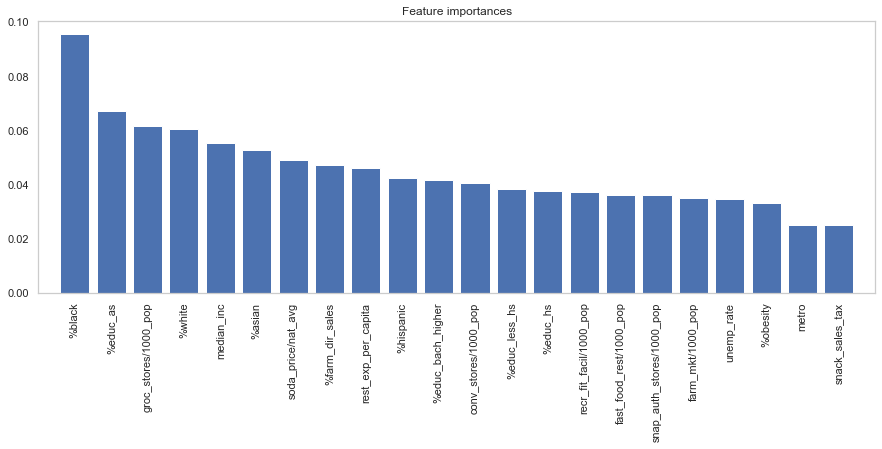

In [109]:
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range( covid_X_train_with.shape[1]), covid_importance_with_df['importance'], align="center")
plt.xticks(range( covid_X_train_with.shape[1]), covid_importance_with_df['features'], rotation=90)
plt.xlim([-1,  covid_X_train_with.shape[1]])
plt.show()

(2) Features without obesity rate

In [110]:
best_covid_model_without = covid_results_cls_without_sorted.iloc[0, -1]

best_covid_model_without = best_covid_model_without.fit(covid_X_train_without, covid_Y_train_cat)

In [111]:
covid_importances_without = best_covid_model_without.feature_importances_
covid_importance_without_df = pd.DataFrame({'features': covid_X_train_without.columns,
                              'importance': covid_importances_without})
covid_importance_without_df = covid_importance_without_df.sort_values(by='importance', ascending=False)
covid_importance_without_df

,features,importance
18,%black,0.092954
17,%white,0.061875
7,groc_stores/1000_pop,0.060862
5,%educ_as,0.056511
14,%farm_dir_sales,0.053980
20,%asian,0.053884
2,median_inc,0.053573
19,%hispanic,0.048808
8,conv_stores/1000_pop,0.047933
10,fast_food_rest/1000_pop,0.046768


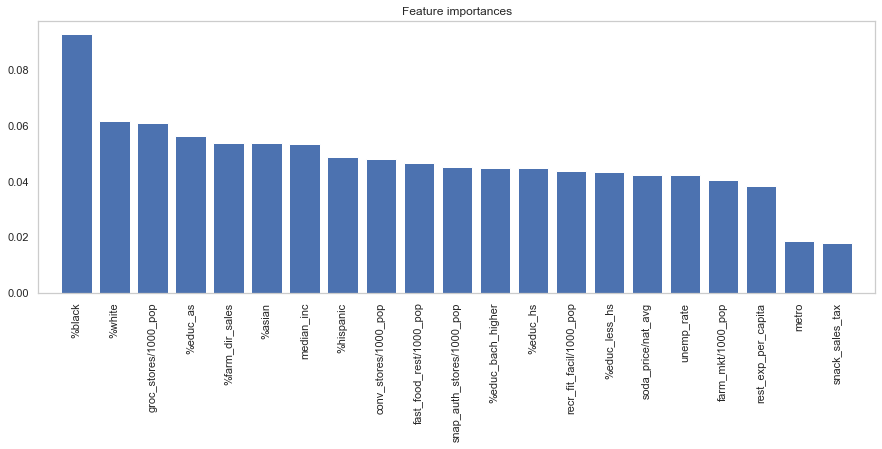

In [112]:
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(covid_X_train_without.shape[1]), covid_importance_without_df['importance'], align="center")
plt.xticks(range( covid_X_train_without.shape[1]), covid_importance_without_df['features'], rotation=90)
plt.xlim([-1,  covid_X_train_without.shape[1]])
plt.show()

This is a very surprising finding that the single most important feature in predicting coronavirus death rates is the percentage of black population in a county, whether or not obesity rate is included in the features (obesity rate does not seem to affect coronavirus death rates from above analysis). The results of our project are far from what we had initially expected. We had expected obesity to be a strong predictor for coronavirus death rates, and therefore we were interested in exploring the best predictors for obesity rates in order to come up with meaningful policy interventions or recommendations that would reduce obesity rates in highly obese counties. However, the results of our project suggests targeting obesity rates would not make a significant difference on coronavirus rates and that policy interventions for reducing obesity and combating coronavirus disease should be looked at separately. To reduce obesity, improving population's highest education level with targeted education policies seems to be the most effective strategy. For fighting coronavirus disease, supports provided to areas with high percentages of black population seem mostly in need. Our results provide interesting, yet uncomfortably candid view of the world. As an extension to this project, it would be worth diving deeper into education policies and race-related issues or data for bettering our machine learning models for predicting both obesity and coronavirus disease rates, as well as providing effective policy recommendations.